In [71]:
import numpy as np
import struct

In [72]:
N = 10000
C = 10 #number of clusters
D = 2000 #number of dimensions
fname = "%d_%d_%d" % (C, D, N)

In [73]:
#for each data point generate a cluster cluster
clusters = np.random.randint(0, C, size=(N))
#initialize the clusters
means = C*D*np.random.rand( C, D )
cov = np.random.rand( C, D, D )
for i in range(C):
#     cov[i] = ((1/(C*D))**2) *np.eye(D)
    cov[i] = (cov[i].T @ cov[i])
    cov[i] = cov[i] / cov[i].max()
    cov[i] = ((1/(C*D))**2) * cov[i]

In [74]:
data = np.zeros( (N,D) )
for i in range(C):
    nrSamples = np.sum(clusters == i)
    samples = np.random.multivariate_normal(mean = means[i, :], cov=cov[i], size = nrSamples)
    data[np.where(clusters == i)[0], :] = samples

In [75]:
data = data - np.tile(data.min(axis=0).reshape(1,D), (N,1))
data = data / np.tile(data.max(axis=0).reshape(1,D), (N,1))
data = 255*data
data = data.astype(np.uint8)

In [76]:
with open(fname, 'wb') as w:
    w.write(struct.pack(">IIII", 2051, N, 1, D))
    w.write(memoryview(data))

In [77]:
clusters = clusters.astype(np.uint8)
with open(fname + '.labels', 'wb') as w:
    w.write(struct.pack(">II", 2049, N))
    w.write(memoryview(clusters))

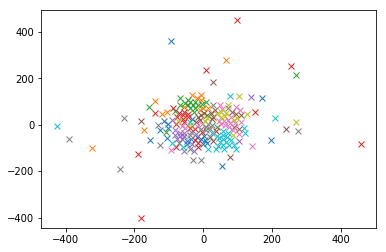

In [78]:
data = data.astype(np.float32)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
model = TSNE(n_components=2)
Y = model.fit_transform(data[:200, :])
plt.figure()
for i in range(C):
    I = clusters[:200] == i
    plt.plot(Y[I, 0], Y[I, 1], 'x')
plt.show()